<br>
<br>

# Setps to follow:

- `Preprocess + EDA + Feature Selection`
- `Extract input and output cols`
- `Scale the values`
- `Train test split`
- `Train the model`
- `Evaluate the model/model Selection`
- `Deploy the model`

<br>
<br>

In [269]:
import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import  StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from mlxtend.plotting import plot_decision_regions

In [270]:
df = pd.read_csv('dataset/placement.csv')
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [271]:
df.tail()

,Unnamed: 0,cgpa,iq,placement
95,95,4.3,200.0,0
96,96,4.4,42.0,0
97,97,6.7,182.0,1
98,98,6.3,103.0,1
99,99,6.2,113.0,1


In [272]:
df.shape

(100, 4)

In [273]:
df.isnull().count()

Unnamed: 0    100
cgpa          100
iq            100
placement     100
dtype: int64

In [274]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.3 KB


In [275]:
# here Unnamed:0 column is unnecessary:

df.drop(columns=["Unnamed: 0"],inplace=True)
df

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0
...,...,...,...
95,4.3,200.0,0
96,4.4,42.0,0
97,6.7,182.0,1
98,6.3,103.0,1


<br>

# EDA: 

<br>

In [276]:

import matplotlib.pyplot as plt 


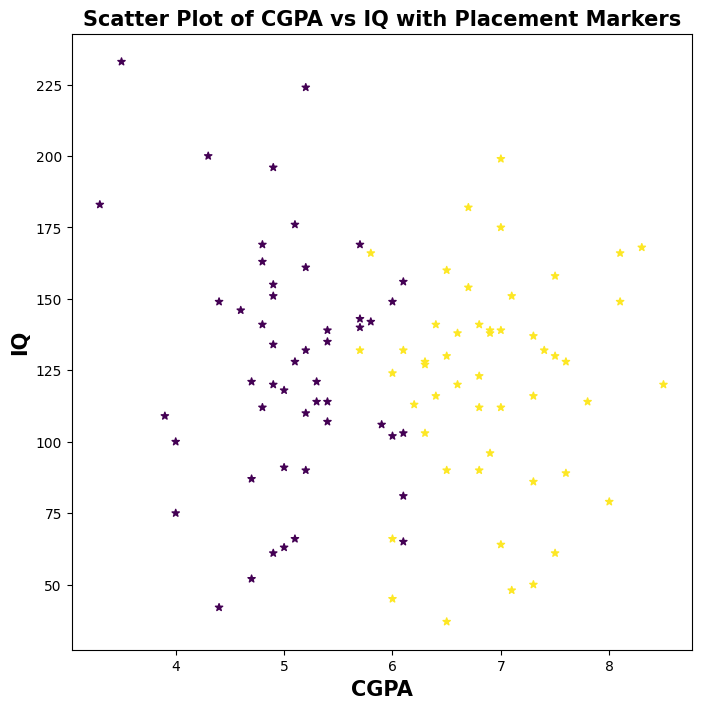

In [277]:
plt.figure(figsize=(8,8))

plt.xlabel('CGPA',fontdict={'fontsize':15,'fontweight':'bold'})
plt.ylabel('IQ',fontdict={"fontsize":15,"fontweight": "bold"})
plt.title('Scatter Plot of CGPA vs IQ with Placement Markers',fontdict={"fontsize":15,"fontweight":"bold"})

"""
If we want to change the color of all points, then i need to give 1000 color for my each data point . 
If i give two or three it won't work. 

Same for, size(s),marker

Here color is applied base on placement value

"""
plt.scatter(df['cgpa'],df['iq'],marker='*',c=df['placement'],s=30)


<br>

- `If we have one dependent variable and one independent variable then it is called simple linear regression`

- `If we have one dependent variable and multiple independent variable then it is called multiple linear regression.`

- `We, if our dependent variable here placement in binary (1,0),(true or false) then we apply linear regression.`

<br>

In [278]:
x = df.iloc[:,0:2]
y = df.iloc[:,2:]

y.head()

,placement
0,1
1,0
2,0
3,1
4,0


In [279]:
x.head()

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0


In [280]:
X_train,X_test,y_train,y_test  = train_test_split(x,y,test_size=0.1)
X_train

,cgpa,iq
2,5.3,121.0
92,5.2,110.0
10,6.0,45.0
44,7.5,61.0
91,7.5,158.0
...,...,...
89,4.9,151.0
87,5.7,132.0
40,4.9,134.0
60,6.9,139.0


In [281]:
X_test

,cgpa,iq
64,7.0,64.0
71,6.1,132.0
79,6.5,90.0
82,6.5,37.0
83,7.5,130.0
67,5.0,118.0
59,4.8,112.0
48,6.6,138.0
18,4.0,100.0
61,7.3,137.0


In [282]:
st = StandardScaler()

In [283]:
X_train = st.fit_transform(X_train)
X_train # give us array cgpa,iq:  range (-1 to 1)

array([[-0.59203045, -0.11380506],
       [-0.67966654, -0.38860264],
       [ 0.02142215, -2.01240653],
       [ 1.33596346, -1.61270095],
       [ 1.33596346,  0.81051408],
       [ 0.45960259,  0.86047727],
       [ 1.16069129, -1.88749854],
       [ 0.02142215,  0.58567969],
       [ 1.59887172, -0.28867625],
       [-1.11784698, -1.83753534],
       [-1.73129959, -1.26295858],
       [-0.67966654,  2.45929956],
       [-0.76730263, -1.48779296],
       [ 0.89778302,  1.23520125],
       [-0.9425748 ,  1.75981481],
       [-1.03021089,  0.38582691],
       [ 0.10905824,  0.76055088],
       [ 0.3719665 ,  0.38582691],
       [ 0.02142215, -0.03886026],
       [ 0.28433042,  0.06106613],
       [ 1.77414389, -1.16303219],
       [ 1.16069129, -0.23871305],
       [ 2.03705216,  1.06033006],
       [ 0.72251085,  0.38582691],
       [-1.20548306,  0.5107349 ],
       [ 0.89778302, -0.33863944],
       [-1.38075524,  0.58567969],
       [-1.11784698, -0.11380506],
       [ 0.02142215,

In [284]:
X_test = st.transform(X_test) # we alrady fit when we do X_train


In [285]:
X_test

array([[ 0.89778302, -1.53775616],
       [ 0.10905824,  0.16099252],
       [ 0.45960259, -0.88823461],
       [ 0.45960259, -2.21225931],
       [ 1.33596346,  0.11102933],
       [-0.85493872, -0.18874985],
       [-1.03021089, -0.33863944],
       [ 0.54723868,  0.31088211],
       [-1.73129959, -0.63841862],
       [ 1.16069129,  0.28590051]])

In [286]:
clf = LogisticRegression()

In [287]:
# model traning:
clf.fit(X_train,y_train)

/home/yasin/allProgram/machine_learning/code/mlEnv/lib/python3.12/site-packages/sklearn/utils/validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [288]:
clf.classes_

array([0, 1])

In [289]:
y_prid = clf.predict(X_test)

In [290]:
y_test

,placement
64,1
71,1
79,1
82,1
83,1
67,0
59,0
48,1
18,0
61,1


In [291]:
accuracy_score(y_pred=y_prid,y_true=y_test)

1.0

<br>
<br>

# see the decision boundary

<br>
<br>

In [292]:

y_train = np.array(y_train)

plot_decision_regions(X_train,y_train.values,clf=clf,legend=2)


AttributeError: 'numpy.ndarray' object has no attribute 'values'

<br>

## using pickle we can convert this into .plk file and use it in our app

<br>

In [ ]:
import pickle

pickle.dump(clf,open('model.pkl','wb'))